In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import clip
import meerkat as mk
import torch
from domino.clip import *

/home/sabri/code/meerkat/meerkat/nn/__init__.py:7: ExperimentalWarning: The `meerkat.nn` module is experimental and has limited test coverage. Proceed with caution.
  warnings.warn(


## Embed words

In [3]:
#words_dp = get_wiki_words(eng_only=True).load()
words_dp = get_wiki_words.out(run_id=4507).load()

In [4]:
#words_dp = embed_words(words_dp).load()
words_dp = embed_words.out(4508).load()

## Embed Images

In [6]:
from domino.data.visual_genome import read_vg
image_dp, attr_dp, object_dp = read_vg()

In [7]:
dp = object_dp.lz[
    object_dp["syn_name"].isin(
        ["man.n.01", "person.n.01", "woman.n.01"]
        #["car.n.01"]
    )
]

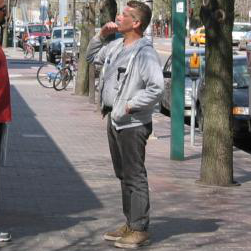

In [8]:
dp[1]["object_image"]

In [9]:
from domino.clip import embed_images

In [10]:
dp = embed_images(dp=dp, img_column="object_image")

In [11]:
dp["has_attribute"] = np.isin(
    dp["object_id"], 
    attr_dp.lz[attr_dp["attribute"] == "talking"]["object_id"]
).astype(int)

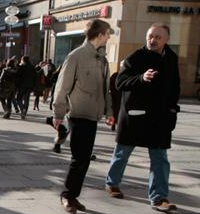

In [12]:
dp.lz[dp["has_attribute"] == 1][4]["object_image"]

In [13]:
words_dp["tokens"][2]

tensor([49406,   320,  1125,   539,   539, 49407,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0])

In [14]:
attr_emb = dp.lz[dp["has_attribute"] == 1]["emb"].data.numpy().mean(axis=0)
ref_emb = dp.lz[dp["has_attribute"] != 1]["emb"].data.numpy().mean(axis=0)

scores = np.dot( 
    words_dp["emb"].data.numpy(),
   (attr_emb - ref_emb)
)
words_dp.lz[(-scores).argsort()[:20]]

,word (PandasSeriesColumn),frequency (PandasSeriesColumn),index (PandasSeriesColumn),tokens (LambdaColumn),emb (TensorColumn)
0,gossiping,433.0,29821,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
1,talking,39855.0,3828,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
2,conversation,31823.0,4358,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
3,chatting,1268.0,20405,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
4,gossipy,219.0,36650,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
...,...,...,...,...,...
15,conversationally,68.0,50051,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
16,speaking,68941.0,2651,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
17,intercommunication,132.0,42116,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
18,interviewer,4255.0,12252,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))


In [15]:
words_dp.lz[(-scores).argsort()[:20]]

,word (PandasSeriesColumn),frequency (PandasSeriesColumn),index (PandasSeriesColumn),tokens (LambdaColumn),emb (TensorColumn)
0,gossiping,433.0,29821,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
1,talking,39855.0,3828,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
2,conversation,31823.0,4358,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
3,chatting,1268.0,20405,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
4,gossipy,219.0,36650,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
...,...,...,...,...,...
15,conversationally,68.0,50051,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
16,speaking,68941.0,2651,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
17,intercommunication,132.0,42116,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
18,interviewer,4255.0,12252,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))


In [16]:
words_dp.lz[:int(1e4)]

,word (PandasSeriesColumn),frequency (PandasSeriesColumn),index (PandasSeriesColumn),tokens (LambdaColumn),emb (TensorColumn)
0,the,151983633.0,0,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
1,the,151983633.0,1,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
2,of,71874676.0,2,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
3,of,71874676.0,3,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
4,and,62210193.0,4,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
...,...,...,...,...,...
9995,halves,6523.0,9995,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
9996,chemotherapy,6521.0,9996,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
9997,sizable,6519.0,9997,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
9998,shutout,6516.0,9998,LambdaCell(fn=),torch.Tensor(shape=torch.Size([512]))
